# Docker performance data analysis

In this notebook there are the plot of the data collected during a performance experiment of the 3 worker container of a Kafka cluster, developed in Docker.
The experiment consists in the following parts:
- first the data are registered without providing any input to the cluster,
- then a producer connect to the cluster create a new topic and start to publish data in it using a constant frequency (1 message/s),
- then the producer starts to publish data increasing the frequency,
- at the end the producer sends in few seconds a huge amount of messages.

The goal of the experiment is to analyze the behaviour of the 3 workers and find an association between the 3 phases and the workers' performance collected.
For this experiment, the data collected concern about the usage of the CPU, memory and network (splitted in input and output).

In [1]:
from matplotlib import pyplot as plt
from data.model.container_data import ContainerData

The ContainerData class is used to import and manage the performance data saved in the 3 csv files.

In [2]:
worker1 = ContainerData("worker-1")
worker1.import_csv("./data/netstress_allcontainers/worker_1_stats.csv")

worker2 = ContainerData("worker-2")
worker2.import_csv("./data/netstress_allcontainers/worker_2_stats.csv")

worker3 = ContainerData("worker-3")
worker3.import_csv("./data/netstress_allcontainers/worker_3_stats.csv")

## Container 1 
Data are split in 3 plots, one for each resource, and the 3 experiment phases are highlited in different colors and explained in the legend.

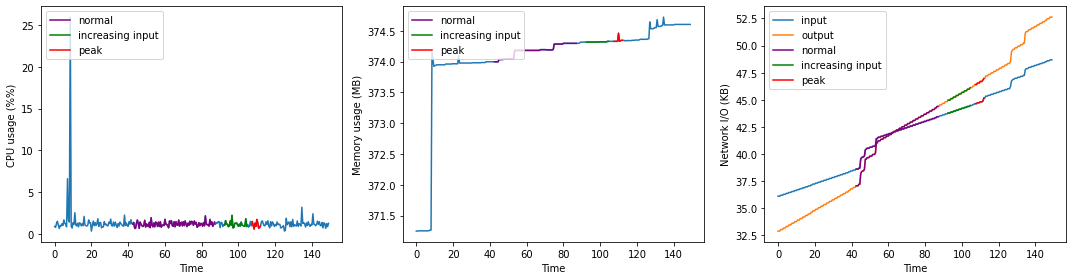

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#print CPU graph
ax1.set_ylabel("CPU usage (%%)")
ax1.set_xlabel("Time")
ax1.plot(worker1.time, worker1.cpu_stats)

#print memory graph
ax2.set_ylabel("Memory usage (MB)")
ax2.set_xlabel("Time")
ax2.plot(worker1.time, worker1.mem_stats)

#print network graph
ax3.set_ylabel("Network I/O (KB)")
ax3.set_xlabel("Time")
ax3.plot(worker1.time, worker1.net_in_stats, label="input")
ax3.plot(worker1.time, worker1.net_out_stats, label="output")

#draw normal input
ax1.plot(worker1.time[85:175], worker1.cpu_stats[85:175], label="normal", color="purple")
ax2.plot(worker1.time[85:175], worker1.mem_stats[85:175], label="normal", color="purple")
ax3.plot(worker1.time[85:175], worker1.net_in_stats[85:175], label="normal", color="purple")
ax3.plot(worker1.time[85:175], worker1.net_out_stats[85:175], color="purple")

#draw increasing frequency
ax1.plot(worker1.time[185:210], worker1.cpu_stats[185:210], label="increasing input", color="green")
ax2.plot(worker1.time[185:210], worker1.mem_stats[185:210], label="increasing input", color="green")
ax3.plot(worker1.time[185:210], worker1.net_in_stats[185:210], label="increasing input", color="green")
ax3.plot(worker1.time[185:210], worker1.net_out_stats[185:210], color="green")

#draw peak
ax1.plot(worker1.time[215:225], worker1.cpu_stats[215:225], label="peak", color="red")
ax2.plot(worker1.time[215:225], worker1.mem_stats[215:225], label="peak", color="red")
ax3.plot(worker1.time[215:225], worker1.net_in_stats[215:225], label="peak", color="red")
ax3.plot(worker1.time[215:225], worker1.net_out_stats[215:225], color="red")

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

The worker 1 doesn't present in the first two graphs a particular behaviour about the publication of data in the topic. The only anomaly registered for the CPU and memory is in the "rest" phase, where we have a peak in the during the initialization of the container. It corresponds to the leader's election property and the worker 1 is the actual leader of the cluster.

Instead in the third graph we have in that in the "normal input" phase the ouput of the container increases and overtake its input. This happens since this container is the leader of the cluster and it register the incoming data and communicate with the zookeper containers. 

## Container 2 Data

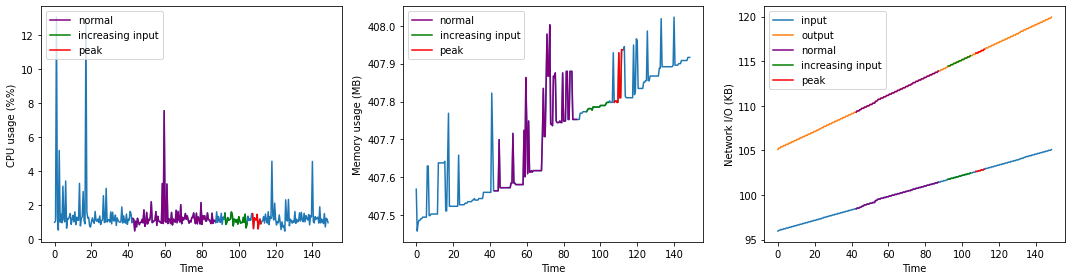

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#print CPU graph
ax1.set_ylabel("CPU usage (%%)")
ax1.set_xlabel("Time")
ax1.plot(worker2.time, worker2.cpu_stats)

#print memory graph
ax2.set_ylabel("Memory usage (MB)")
ax2.set_xlabel("Time")
ax2.plot(worker2.time, worker2.mem_stats)

#print network graph
ax3.set_ylabel("Network I/O (KB)")
ax3.set_xlabel("Time")
ax3.plot(worker2.time, worker2.net_in_stats, label="input")
ax3.plot(worker2.time, worker2.net_out_stats, label="output")
ax3.legend(loc='upper left')

#draw normal input
ax1.plot(worker2.time[85:175], worker2.cpu_stats[85:175], label="normal", color="purple")
ax2.plot(worker2.time[85:175], worker2.mem_stats[85:175], label="normal", color="purple")
ax3.plot(worker2.time[85:175], worker2.net_in_stats[85:175], label="normal", color="purple")
ax3.plot(worker2.time[85:175], worker2.net_out_stats[85:175], color="purple")

#draw increasing frequency
ax1.plot(worker2.time[185:210], worker2.cpu_stats[185:210], label="increasing input", color="green")
ax2.plot(worker2.time[185:210], worker2.mem_stats[185:210], label="increasing input", color="green")
ax3.plot(worker2.time[185:210], worker2.net_in_stats[185:210], label="increasing input", color="green")
ax3.plot(worker2.time[185:210], worker2.net_out_stats[185:210], color="green")

#draw peak
ax1.plot(worker2.time[215:225], worker2.cpu_stats[215:225], label="peak", color="red")
ax2.plot(worker2.time[215:225], worker2.mem_stats[215:225], label="peak", color="red")
ax3.plot(worker2.time[215:225], worker2.net_in_stats[215:225], label="peak", color="red")
ax3.plot(worker2.time[215:225], worker2.net_out_stats[215:225], color="red")

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

Worker 2 doesn't present particular behavoiurs about the production of data in the topic.

## Container 3 data

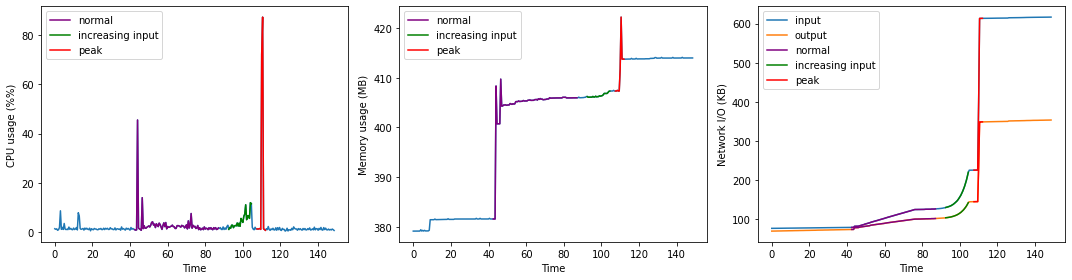

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
#print CPU graph
ax1.set_ylabel("CPU usage (%%)")
ax1.set_xlabel("Time")
ax1.plot(worker3.time, worker3.cpu_stats)

#print memory graph
ax2.set_ylabel("Memory usage (MB)")
ax2.set_xlabel("Time")
ax2.plot(worker3.time, worker3.mem_stats)

#print network graph
ax3.set_ylabel("Network I/O (KB)")
ax3.set_xlabel("Time")
ax3.plot(worker3.time, worker3.net_in_stats, label="input")
ax3.plot(worker3.time, worker3.net_out_stats, label="output")

#draw normal input
ax1.plot(worker3.time[85:175], worker3.cpu_stats[85:175], label="normal", color="purple")
ax2.plot(worker3.time[85:175], worker3.mem_stats[85:175], label="normal", color="purple")
ax3.plot(worker3.time[85:175], worker3.net_in_stats[85:175], label="normal", color="purple")
ax3.plot(worker3.time[85:175], worker3.net_out_stats[85:175], color="purple")

#draw increasing frequency
ax1.plot(worker3.time[185:210], worker3.cpu_stats[185:210], label="increasing input", color="green")
ax2.plot(worker3.time[185:210], worker3.mem_stats[185:210], label="increasing input", color="green")
ax3.plot(worker3.time[185:210], worker3.net_in_stats[185:210], label="increasing input", color="green")
ax3.plot(worker3.time[185:210], worker3.net_out_stats[185:210], color="green")

#draw peak
ax1.plot(worker3.time[215:225], worker3.cpu_stats[215:225], label="peak", color="red")
ax2.plot(worker3.time[215:225], worker3.mem_stats[215:225], label="peak", color="red")
ax3.plot(worker3.time[215:225], worker3.net_in_stats[215:225], label="peak", color="red")
ax3.plot(worker3.time[215:225], worker3.net_out_stats[215:225], color="red")

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

The data collected for the third worker are the most interesting for the experiment's evaluation.

The "normal input" phase presents a peak in the CPU and the memory graphs. It corresponds to the topic creation in the container. Instead in the network graph we have an increasing of the input and output indexes, without the overtake of the output one on the other one as presented in the worker 1.

The "increasing input" phase doesn't present a peak in any graph. However we can note that in the network graph there is growth of the two indexes that fits well the expected behaviour. In the same way the CPU's index grow.

At the end, the "peak" phase presents the expected behaviour with a peak in all three graphs.

## Conclusions

What we can conclude from the collected data is that the actions of a producers impacts intensevely only on the worker where the topic is created and in a waker way on the leader of the cluster.

The main indexes used to the recognize an anomaly are the network input and output, however is important to watch also the performance of the CPU and the memory in order to avoid an overload of the cluster.